In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('air_quality.csv')
df.dropna(inplace=True)

In [31]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
         pm25         no2  temperature quality_level
0  157.744434    5.376279    31.109108          high
1  101.270316  130.903661    19.298140           low
2  197.204350   17.254966    37.652832          high
3   81.580404   91.605322    39.682532           low
4  152.419877  148.007264    12.175063           low


In [12]:
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (100, 4)


In [13]:
print(df.describe())

             pm25         no2  temperature
count  100.000000  100.000000   100.000000
mean   105.412206   77.620756    23.055799
std     51.735985   42.856456     9.624893
min     12.597673    5.376279     5.427108
25%     68.011331   38.530599    14.798288
50%    108.689641   82.601991    23.893730
75%    149.116546  111.860383    31.148723
max    197.204350  149.602053    39.919242


In [14]:
print("\nData Types:")
print(df.dtypes)


Data Types:
pm25             float64
no2              float64
temperature      float64
quality_level     object
dtype: object


In [15]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
pm25             0
no2              0
temperature      0
quality_level    0
dtype: int64


In [24]:
X = df[["pm25", "no2", "temperature"]]
y = df["quality_level"]

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)

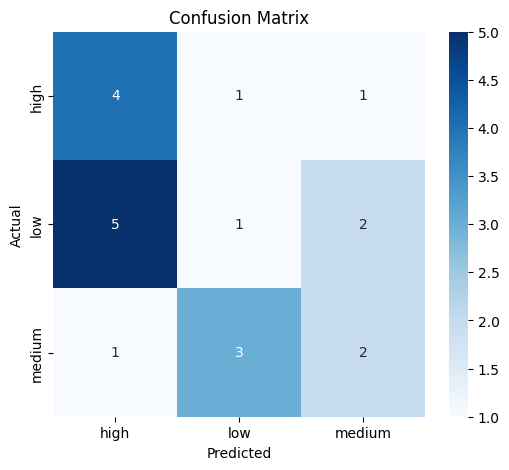

Accuracy: 0.35
Precision: 0.32
Recall: 0.35
F1 Score: 0.32062937062937064


In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))